# KMEANS CLUSTERING

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random

In [47]:
class Kmeans:
    def __init__(self,niter,nclusters):
        self.iter=niter
        self.clusters=nclusters
        self.centroid=None


    def fit(self,X):
        self.centroid=X[random.sample(range(0,X.shape[0]),self.clusters)]
        for i in range(self.iter):
            cluster=self.assign_cluster(X)
            old_cent=self.centroid
            self.centroid=self.change_centroid(X,cluster)
            if np.array_equal(old_cent,self.centroid):
                return cluster
            

    def assign_cluster(self,X):
        cluster=[]
        distances=[]
        for row in X:
            for cent in self.centroid:
                dist=self.find_dist(row,cent)
                distances.append(dist)
            mindist=min(distances)
            index=distances.index(mindist)
            cluster.append(index)
            distances.clear()
        return np.array(cluster)


    def find_dist(self,X,centroid):
        return np.dot(X-centroid,X-centroid)


    def change_centroid(self,X,cluster):
        new_cent=[]
        types=np.unique(cluster)
        for type in types:
            new_cent.append(X[cluster==type].mean(axis=0))
        return np.array(new_cent)

In [4]:
df=pd.read_csv('./data/student_clustering.csv')

In [5]:
df

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


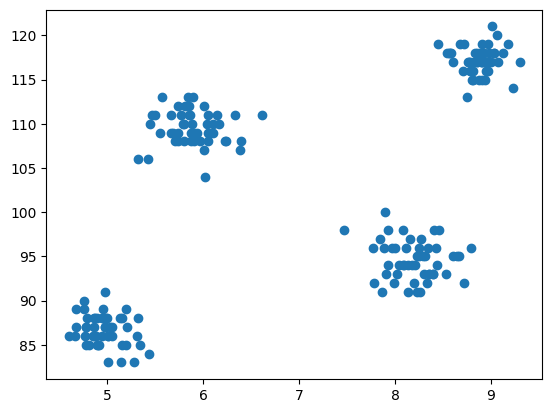

In [28]:

plt.scatter(df['cgpa'],df['iq'])

In [48]:
X=df.iloc[:,:].values
km=Kmeans(niter=100,nclusters=4)
pred=km.fit(X)

C:\Users\vedan\AppData\Local\Temp\ipykernel_2148\2256318727.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


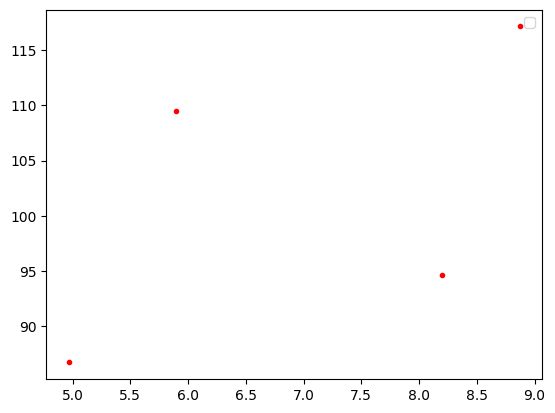

In [49]:
centroids = km.centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='.')
plt.legend()

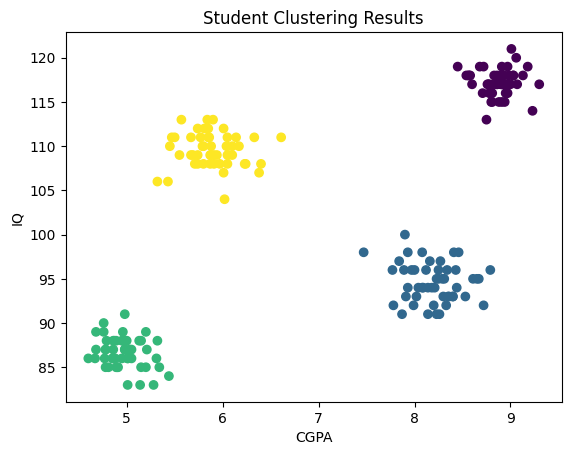

In [50]:
scatter = plt.scatter(df['cgpa'], df['iq'], c=pred, cmap='viridis')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Student Clustering Results')
plt.show()